## Predicting Student Admissions
In this notebook, we predict student admissions to graduate school at UCLA based on three pieces of data:

- GRE Scores (Test)
- GPA Scores (Grades)
- Class rank (1-4)
- The dataset originally came from here: http://www.ats.ucla.edu/

### 1. Load and visualize the data
To load the data, we will use a very useful data package called Pandas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE856F2B48>,
      dtype=object)

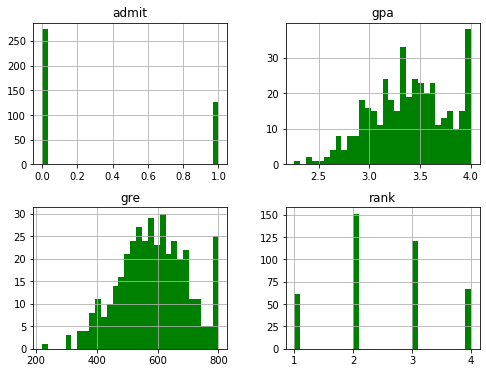

In [4]:
# Visualising our data
df.hist(bins=30,color="green",figsize=(8,6))

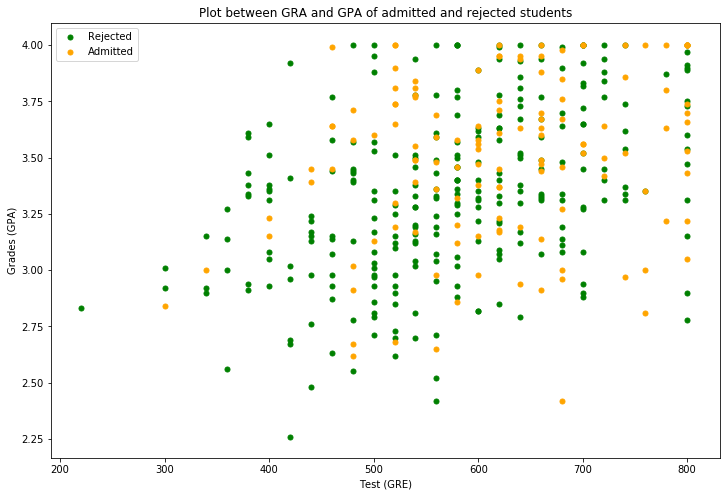

In [5]:
# Visualing out data
def plot_points(df):
    X = np.array(df[["gre","gpa"]])
    y = np.array(df["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.figure(figsize=(12,8))
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'green',label="Rejected")
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'orange',label="Admitted")
    plt.xlabel('Test (GRE)')
    plt.title("Plot between GRA and GPA of admitted and rejected students")
    plt.legend()
    plt.ylabel('Grades (GPA)')

plot_points(df)

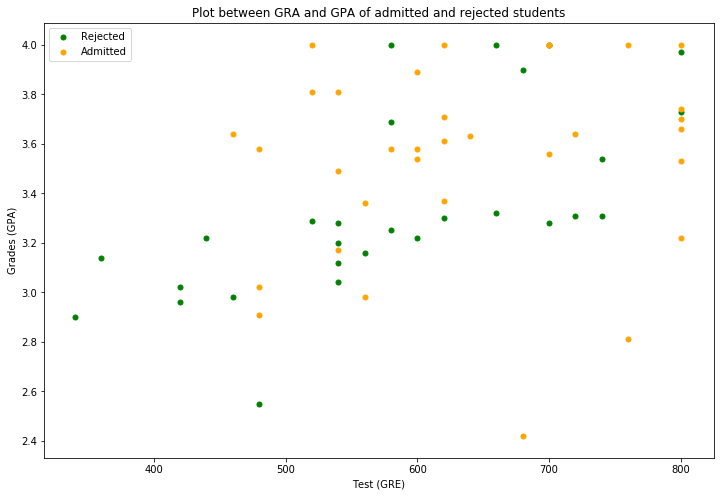

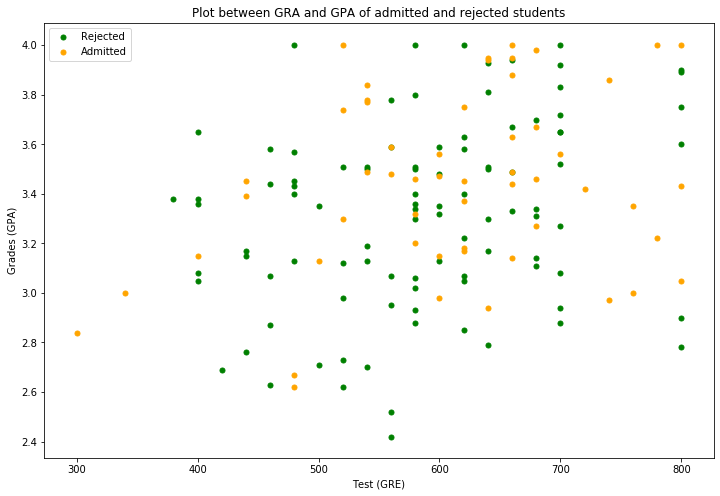

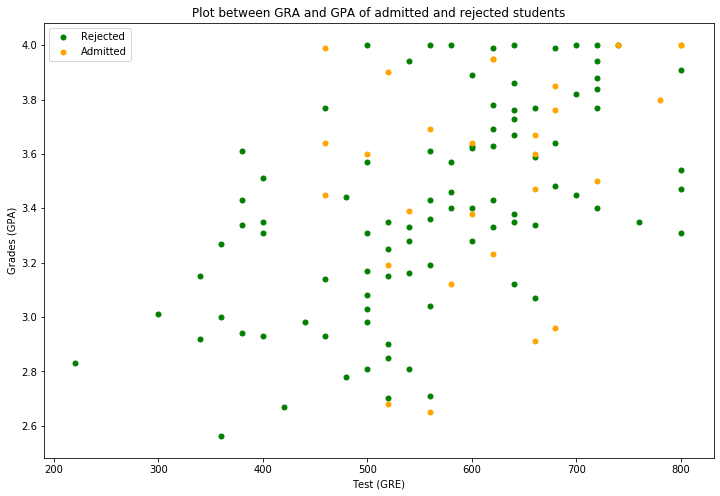

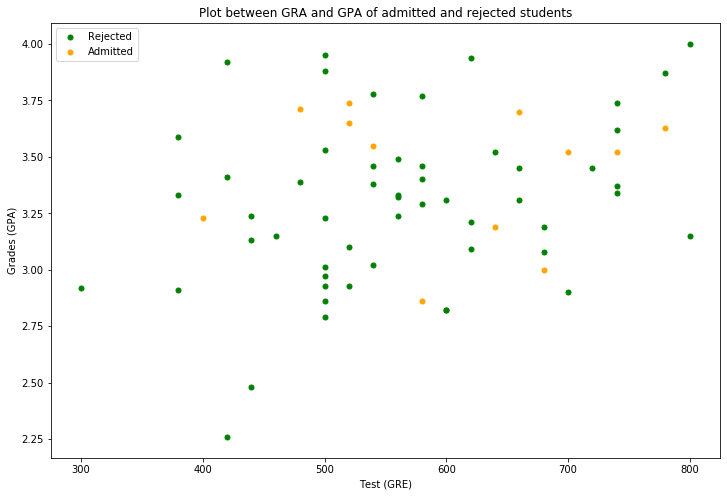

In [6]:
#Let's try to seprate data by rank

data1 = df[df['rank']== 1]
data2 = df[df['rank']== 2]
data3 = df[df['rank']== 3]
data4 = df[df['rank']== 4]

plot_points(data1)
plot_points(data2)
plot_points(data3)
plot_points(data4)

These plots look a bit more linearly separable, although not completely. But it seems that using a multi-layer perceptron with the rank, gre, and gpa as inputs, may give us a decent solution.

### 2. Process the data
We'll do the following steps to clean up the data for training:

One-hot encode the rank
Normalize the gre and the gpa scores, so they'll be in the interval (0,1)
Split the data into the input X, and the labels y.

In [7]:
import keras
from keras.utils import np_utils

# remove NaNs
df = df.fillna(0)

# One-hot encoding the rank
processed_data = pd.get_dummies(df, columns=['rank'])

# Normalizing the gre and the gpa scores to be in the interval (0,1)
processed_data["gre"] = processed_data["gre"]/800
processed_data["gpa"] = processed_data["gpa"]/4

# Splitting the data input into X, and the labels y 
X = np.array(processed_data)[:,1:]
X = X.astype('float32')
y = keras.utils.to_categorical(df["admit"])

Using TensorFlow backend.


In [8]:

# Checking that the input and output look correct
print("Shape of X:", X.shape)
print("\nShape of y:", y.shape)
print("\nFirst 10 rows of X")
print(X[:10])
print("\nFirst 10 rows of y")
print(y[:10])

Shape of X: (400, 6)

Shape of y: (400, 2)

First 10 rows of X
[[0.475  0.9025 0.     0.     1.     0.    ]
 [0.825  0.9175 0.     0.     1.     0.    ]
 [1.     1.     1.     0.     0.     0.    ]
 [0.8    0.7975 0.     0.     0.     1.    ]
 [0.65   0.7325 0.     0.     0.     1.    ]
 [0.95   0.75   0.     1.     0.     0.    ]
 [0.7    0.745  1.     0.     0.     0.    ]
 [0.5    0.77   0.     1.     0.     0.    ]
 [0.675  0.8475 0.     0.     1.     0.    ]
 [0.875  0.98   0.     1.     0.     0.    ]]

First 10 rows of y
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


### 3. Split the data into training and testing sets
Usually spliting data into 80% (training) and 20%(testing) set is nicer.

In [9]:
# break training set into training and validation sets
(X_train, X_test) = X[50:], X[:50]
(y_train, y_test) = y[50:], y[:50]

# print shape of training set
print('x_train shape:', X_train.shape)

# print number of training, validation, and test images
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (350, 6)
350 train samples
50 test samples


### 4. Define the model architecture

In [10]:
# Imports
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Flatten,Dropout
from keras.optimizers import SGD
from keras.utils import np_utils

In [11]:
## Building the model
# Note that filling out the empty rank as "0", gave us an extra column, for "Rank 0" students.
# Thus, our input dimension is 7 instead of 6.

model = Sequential()
model.add(Dense(128,input_dim=X.shape[1]))
model.add(Activation('sigmoid'))
model.add(Dense(64))
model.add(Activation('sigmoid'))
model.add(Dense(2))
model.add(Activation('sigmoid'))
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
model.summary()

W1110 21:54:04.664902 10780 deprecation_wrapper.py:119] From C:\Users\Sarwar\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:518: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1110 21:54:04.664902 10780 deprecation_wrapper.py:119] From C:\Users\Sarwar\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:4139: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1110 21:54:04.770605 10780 deprecation_wrapper.py:119] From C:\Users\Sarwar\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1110 21:54:04.839727 10780 deprecation_wrapper.py:119] From C:\Users\Sarwar\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:3296: The name tf.log is deprecated. Please use tf.math.log i

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               896       
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
_________________________________________________________________
activation_3 (Activation)    (None, 2)                 0         
Total params: 9,282
Trainable params: 9,282
Non-trainable params: 0
_________________________________________________________________


### 5. Train the model

In [12]:
# Call fit method to train the model.
model.fit(X_train, y_train, epochs=1000, batch_size=100, verbose=0)


W1110 21:58:13.331195 10780 deprecation.py:323] From C:\Users\Sarwar\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1110 21:58:13.431471 10780 deprecation_wrapper.py:119] From C:\Users\Sarwar\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:987: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W1110 21:58:13.609724 10780 deprecation_wrapper.py:119] From C:\Users\Sarwar\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:974: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



### 6. Score the model

In [13]:
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[-1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

350/350 [==============================] - 0s 268us/step

 Training Accuracy: 0.7171428591864449
50/50 [==============================] - 0s 120us/step

 Testing Accuracy: 0.6400000095367432


## 7. Furture tweeking can be done with parameters!
You can see that we made several decisions in our training. For instance, the number of layers, the sizes of the layers, the number of epochs, etc.

The following parameters can be changes.

- Activation function: relu and sigmoid
- Loss function: categorical_crossentropy, mean_squared_error
- Optimizer: rmsprop, adam

### MODEL 2

In [18]:

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(6,)))
model.add(Dropout(.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(2, activation='softmax'))

# Compiling the model
model.compile(loss = 'mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               896       
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 130       
Total params: 9,282
Trainable params: 9,282
Non-trainable params: 0
_________________________________________________________________


In [19]:
#Train
model.fit(X_train, y_train, epochs=1000, batch_size=100, verbose=0)

In [20]:
# Evaluate
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

350/350 [==============================] - 0s 721us/step

 Training Accuracy: 0.7485714282308306
50/50 [==============================] - 0s 200us/step

 Testing Accuracy: 0.6199999976158143


### MODEL 3

In [22]:
model = Sequential()
model.add(Dense(128, activation='sigmoid', input_shape=(6,)))
model.add(Dropout(.2))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(.2))
model.add(Dense(32, activation='sigmoid'))
model.add(Dropout(.1))
model.add(Dense(2, activation='softmax'))

# Compiling the model
model.compile(loss = 'mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 128)               896       
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_10 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 66        
Total para

In [23]:
#Train
model.fit(X_train, y_train, epochs=300, batch_size=100, verbose=0)

In [24]:
# Evaluate
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

350/350 [==============================] - 0s 688us/step

 Training Accuracy: 0.7028571425165449
50/50 [==============================] - 0s 140us/step

 Testing Accuracy: 0.6399999976158142


## Feel free to try other preprocessing and  settings to get more better accuracy.
                     #############################################################